# Real Estate Price Prediction

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [84]:
import pandas as pd
import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
matplotlib.rcParams["figure.figsize"] = (20,10)

In [123]:
df = pd.read_csv("/content/drive/MyDrive/ml_practice/ml_projects/project_01_real_estate_price_prediction/bengaluru_house_prices.csv")
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [124]:
df.shape

(13320, 9)

## Data Cleaning

Taking off some columns that doesnt help in prediction from dataframe

In [125]:
df1 = df.drop(['area_type','availability','society','balcony'], axis ='columns')
df1.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [126]:
df1.shape

(13320, 5)

Handling missing values

In [127]:
df1.isnull().sum()

,0
location,1
size,16
total_sqft,0
bath,73
price,0


Since there are many rows to learn and very few null values we can remove those rows

In [128]:
df2 = df1.dropna()
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [129]:
df2.shape

(13246, 5)

Column 'size' is differed with same values but different names. Lets check that by looking at its unique values

In [130]:
df2['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

Creating new column with only the values of bedroom

In [131]:
df2['bhk'] = df2['size'].apply(lambda x: int(x.split(' ')[0]))
df2.bhk.unique()

/tmp/ipython-input-4049590364.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['bhk'] = df2['size'].apply(lambda x: int(x.split(' ')[0]))


array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18])

In [132]:
df2.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [133]:
df2['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18])

In [134]:
df2[df2.bhk > 20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


43 bedrooms in 2400 sq ft is not possible to we have to check total_sqft

In [135]:
df2['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [136]:
def convert_float(x):
  try:
    float(x)
  except:
    return False
  return True

Taking values that are in range anf not in numbers using ~

In [137]:
df2[~df2['total_sqft'].apply(convert_float)].head(10)

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


We can see that sq ft has a range rather than a single value, so lets rectify it by taking average of that range, where ever there is a measurement, lets remove that row or we can convert it to sqft

In [138]:
def convert_sqft_num(x):
  tokens = x.split('-')
  if len(tokens) ==2:
    return (float(tokens[0]) + float(tokens[1]))/2
  try:
    return float(x)
  except:
    return None

In [139]:
df3 = df2.copy() # taking a deep copy
df3['total_sqft'] = df3['total_sqft'].apply(convert_sqft_num)
df3 = df3[df3.total_sqft.notnull()]
df3.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [140]:
df3.loc[30]

,30
location,Yelahanka
size,4 BHK
total_sqft,2475.0
bath,4.0
price,186.0
bhk,4


## Feature Engineering, Dimensionality reduction

Creating a new column 'Price_per_sqft' as it may help in outlier cleaning but not in prediction.

In [141]:
df4 = df3.copy()

df4['price_per_sqft'] = (df4['price']*100000) / df4['total_sqft']
df4.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


Lets do something with location column as it is in text or categorical, and we need only numbers.

In [142]:
df4['location'].unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [143]:
len(df4['location'].unique())

1298

we cant take dummy varibales or catergorical variables for 1304 columns. we are stuck with dimensionality curse.

In [144]:
df4.location = df4.location.apply(lambda x: x.strip()) # cleaning this column
loaction_stats = df4.groupby('location')['location'].agg('count').sort_values(ascending = False)
loaction_stats

,location
location,
Whitefield,533
Sarjapur Road,392
Electronic City,304
Kanakpura Road,264
Thanisandra,235
...,...
"beml layout, basaveshwara nagar",1
basaveshwarnagar,1
1 Giri Nagar,1


In [145]:
loaction_stats.values.sum()

np.int64(13200)

We are setting a threshold where locations that has less than 10 points are considered as other location

In [146]:
len(loaction_stats[loaction_stats<=10])

1047

In [147]:
location_stats_less_10 = loaction_stats[loaction_stats<=10]
location_stats_less_10

,location
location,
1st Block Koramangala,10
Thyagaraja Nagar,10
Ganga Nagar,10
Nagappa Reddy Layout,10
Gunjur Palya,10
...,...
"beml layout, basaveshwara nagar",1
basaveshwarnagar,1
1 Giri Nagar,1


In [148]:
df4.location = df4.location.apply(lambda x: 'other' if x in location_stats_less_10 else x)
''' from this we will have only 242 columns when converted to one hot encoding, much better
from before which is 1304 columns'''
len(df4.location.unique())

241

In [149]:
df4.head(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275
9,other,6 Bedroom,1020.0,6.0,370.00,6,36274.509804


## Outlier Detection and Removal techniques

In [150]:
df4[df4.total_sqft/df4.bhk < 300].head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000


In [151]:
df4.shape

(13200, 7)

In [152]:
df5 = df4[~(df4.total_sqft/df4.bhk < 300)]
df5.shape

(12456, 7)

Now lets work with 'price_per_sqft' column as outliers can cause model to vary differently

In [153]:
df5.price_per_sqft.describe()

,price_per_sqft
count,12456.000000
mean,6308.502826
std,4168.127339
min,267.829813
25%,4210.526316
50%,5294.117647
75%,6916.666667
max,176470.588235


In [156]:
def remove_pps_outliers(df):
  df_out = pd.DataFrame()
  for key, subdf in df.groupby('location'):
    mean = np.mean(subdf.price_per_sqft)
    std = np.std(subdf.price_per_sqft)
    reduced_df = subdf[(subdf.price_per_sqft > (mean - std)) & (subdf.price_per_sqft <=(mean + std))]
    df_out = pd.concat([df_out, reduced_df], ignore_index= True)
  return df_out

In [157]:
df6 = remove_pps_outliers(df5)
df6.shape

(10242, 7)

In [158]:
def scatter_plot(df, location):
  bhk_2 = df[(df.location == location) & (df.bhk ==2)]
  bhk_3 = df[(df.location == location) & (df.bhk == 3)]
  matplotlib.rcParams['figure.figsize'] = (10, 7)
  plt.scatter(bhk_2.total_sqft, bhk_2.price, color = 'blue', label ='2 BHK', s =50)
  plt.scatter(bhk_3.total_sqft, bhk_3.price, marker ='+', color ='green', label = '3 BHK', s= 50)
  plt.xlabel('Square feet Area')
  plt.ylabel('Price')
  plt.title(location)
  plt.legend

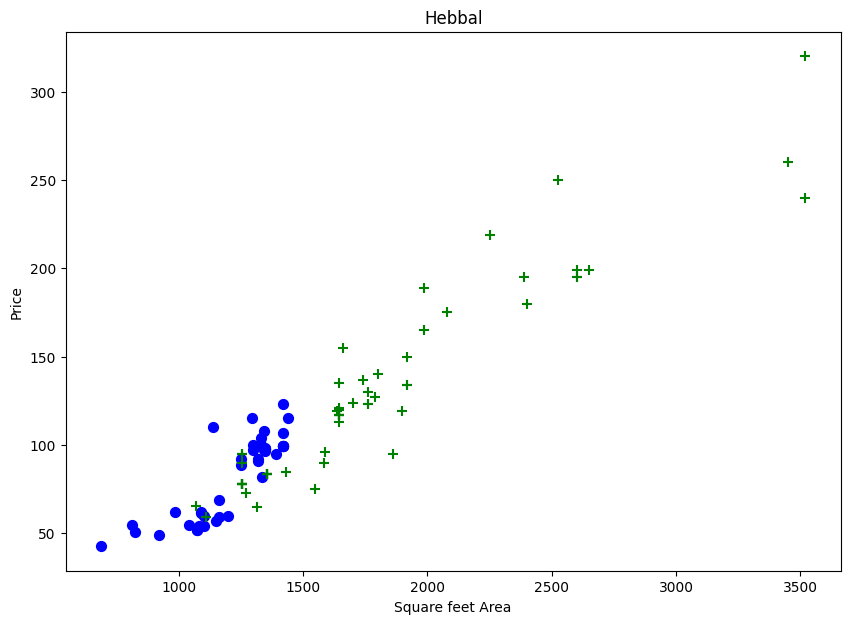

In [159]:
scatter_plot(df6, 'Hebbal')

From the above plot, we can see that some 2 bhks cost more than 3 bhk, so we are removing the properties where 2 bhk and 3 bhk price differs at same location

In [160]:
def remove_bhk_outliers(df):
  exclude_indices = np.array([])
  for location, location_df in df.groupby('location'):
    bhk_stats = {}
    for bhk, bhk_df in location_df.groupby('bhk'):
      bhk_stats[bhk] ={
          'mean': np.mean(bhk_df.price_per_sqft),
          'std': np.std(bhk_df.price_per_sqft),
          'count': bhk_df.shape[0]
      }
    for bhk, bhk_df in location_df.groupby('bhk'):
      stats = bhk_stats.get(bhk -1)
      if stats and stats['count'] > 5:
        exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft < (stats['mean'])].index.values)
  return df.drop(exclude_indices, axis = 'index')

In [181]:
df7 = remove_bhk_outliers(df6)
df7.shape

(7317, 7)

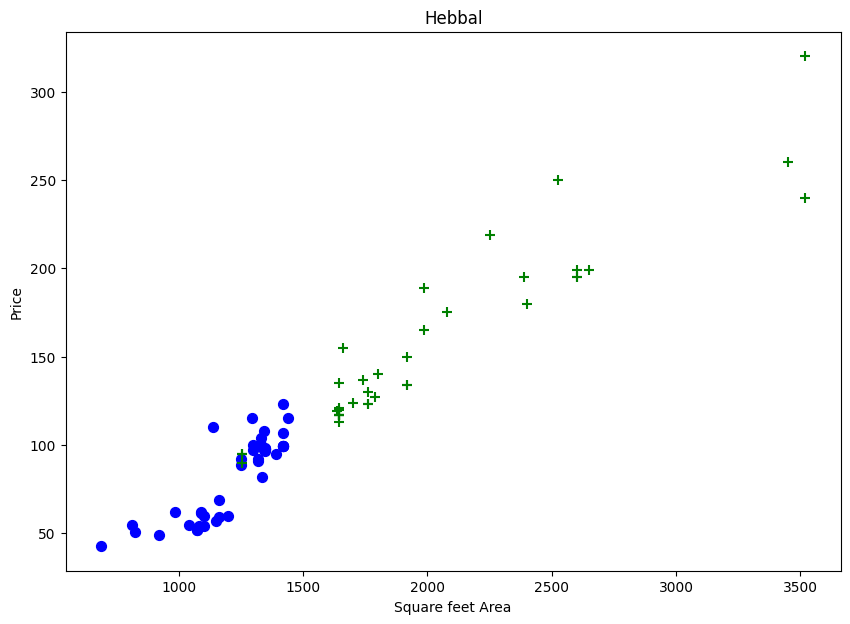

In [182]:
scatter_plot(df7, 'Hebbal')

Text(0, 0.5, 'Count')

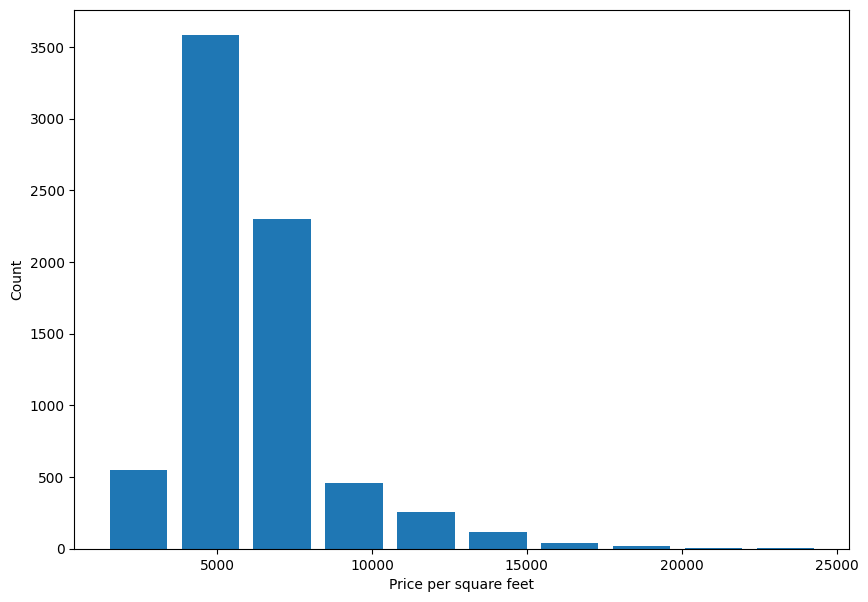

In [183]:
plt.hist(df7.price_per_sqft, rwidth=0.8)
plt.xlabel('Price per square feet')
plt.ylabel('Count')

Now lets check if there are any outliers caused by bath features

In [184]:
df7.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

Text(0, 0.5, 'Count')

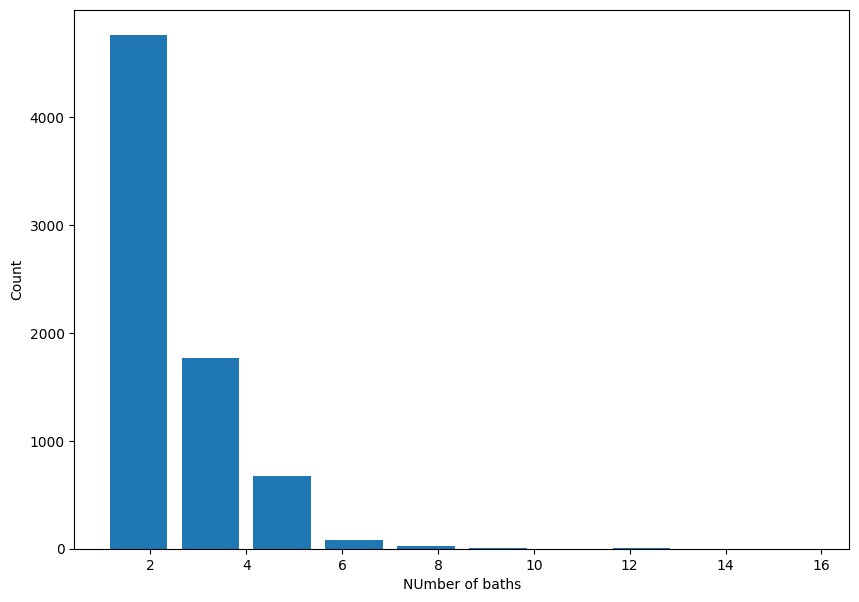

In [185]:
plt.hist(df7.bath, rwidth=0.8)
plt.xlabel('NUmber of baths')
plt.ylabel('Count')

In [186]:
df7[df7.bath>10]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
5277,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
8483,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
8572,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
9306,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
9637,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


In [192]:
df7[df7.bath>df7.bhk+2]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1626,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5238,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6711,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8408,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689


In [193]:
df8 = df7[df7.bath<df7.bhk+2]
df8.shape

(7239, 7)

In [194]:
df9 = df8.drop(['size','price_per_sqft'], axis = 'columns')
df9.head()

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


As machine learning algorithms works only with numerical data, we are encoding the location column using one hot encoding/ dummies.

In [195]:
dummies = pd.get_dummies(df9.location, dtype = int)
dummies.head(3)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [196]:
df10 = pd.concat([df9, dummies.drop('other', axis ='columns')], axis = 'columns')
df10.head()

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [197]:
df11 = df10.drop('location', axis ='columns')
df11.head()

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,130.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,148.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [198]:
df11.shape

(7239, 244)

Creating independent and target variables

In [199]:
X = df11.drop('price', axis = 'columns')
X.head(3)

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [200]:
y = df11.price
y.head(3)

,price
0,428.0
1,194.0
2,235.0


Splitting training and testing variables

In [201]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=10)

Lets train model and test its accuracy

In [202]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train, y_train)
lr_clf.score(X_test, y_test)

0.8629132245229444

## Testing which models and parameters to use for this dataset using K Fold Cross validation technique

We are using ShuffleSplit because it helps to randomize and take equal set of folds

In [203]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.82702546, 0.86027005, 0.85322178, 0.8436466 , 0.85481502])

We can see that Linear regression performs well with this dataset even with 5 splits, still lets compare it with other models using

## Grid Search CV (Hyper Parameter Tuning)

Lets check the performance for two other algorithms

In [204]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

In [206]:
def find_best_model(X,y):
  models = {
      'linear_regression':{
          'model': LinearRegression(),
          'params':{
              # 'normalize':[True, False] - error because of deprected, empty params
          }
      },
      'lasso':{
          'model':Lasso(),
          'params':{
              'alpha':[1,2],
              'selection':['random', 'cyclic']
          }
      },
      'decision_tree':{
          'model' : DecisionTreeRegressor(),
          'params':{
              'criterion':['squared_error', 'friedman_mse'],
              'splitter':['best', 'random']
          }
      }
  }

  scores = []
  cv = ShuffleSplit(n_splits=5, test_size = 0.2, random_state=0)
  for model_name, config in models.items():
    gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score = False) # dont store training score, but only validation
    gs.fit(X,y)
    scores.append({
        'model': model_name,
        'best_score': gs.best_score_,
        'best_params': gs.best_params_
    })
  return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])


In [207]:
find_best_model(X,y)

,model,best_score,best_params
0,linear_regression,0.847796,{}
1,lasso,0.726831,"{'alpha': 2, 'selection': 'random'}"
2,decision_tree,0.720318,"{'criterion': 'friedman_mse', 'splitter': 'ran..."


Linear Regression performs well among others, so we will use already trained Linear Regression model

In [208]:
X.columns

Index(['total_sqft', 'bath', 'bhk', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout', '5th Phase JP Nagar',
       '6th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=243)

In [209]:
## Lets predict

def predict_price(location, sqft, bath, bhk):
  loc_index = np.where(X.columns ==location)[0][0]

  x = np.zeros(len(X.columns))
  x[0] = sqft
  x[1] = bath
  x[2] = bhk
  if loc_index >=0:
    x[loc_index] = 1

  return lr_clf.predict([x])[0]

In [210]:
predict_price('1st Phase JP Nagar', 1000, 2, 2)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


np.float64(83.86570258311967)

In [211]:
predict_price('1st Phase JP Nagar', 1000, 3, 3)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


np.float64(86.0806228498673)

In [212]:
predict_price('Indira Nagar',1000, 2, 2)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


np.float64(193.3119773317982)

In [213]:
predict_price('Indira Nagar',1000, 3, 3)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


np.float64(195.52689759854582)

Exporting the model to pick

In [218]:
import pickle
with open('/content/drive/MyDrive/ml_practice/ml_projects/project_01_real_estate_price_prediction/banglore_home_prices_model.pickle', 'wb') as f:
  pickle.dump(lr_clf,f)

Exporting json file that contains column names so that it can be useful in future prediction

In [217]:
import json
columns ={
    'data_columns' :[col.lower() for col in X.columns]
}
with open('/content/drive/MyDrive/ml_practice/ml_projects/project_01_real_estate_price_prediction/columns.json','w') as f:
  f.write(json.dumps(columns))